In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob 
%matplotlib inline


In [ ]:
data = np.load('/content/drive/MyDrive/data_10000_norm.npz')

In [ ]:
x= data['arr_0'] # independent features
y = data['arr_1'] # target value

In [ ]:
x.shape,y.shape

**Eigen image**

In [ ]:
x1 = x - x.mean(axis=0)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')


In [ ]:

x_pca = pca.fit_transform(x1)

In [ ]:
x_pca.shape


(5465, 5465)

In [ ]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no of components')
plt.ylabel('Explaied Varience Ratio')
plt.subplot(1,2,2)
#plt.plot(eigen_ratio_cum[:200])
plt.xlabel('no of components')
plt.ylabel('Cumalitive Explaied Varience Ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show()

Conclusion: Using elbow method of component is between 25-30
Since if i consider component between 25-30 the explained varience is around 75% so,
inorder to get minimum 80% varience i am considering 50 components

In [ ]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(x1)

In [ ]:
x_pca_50.shape

In [ ]:
import pickle
#Saving PCA
pickle.dump(pca_50,open('/content/drive/MyDrive/pca_50.pickle','wb'))

In [ ]:
#Consider 50 components and inverse transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [ ]:
x_pca_inv.shape

(5465, 10000)

In [ ]:
#cosider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

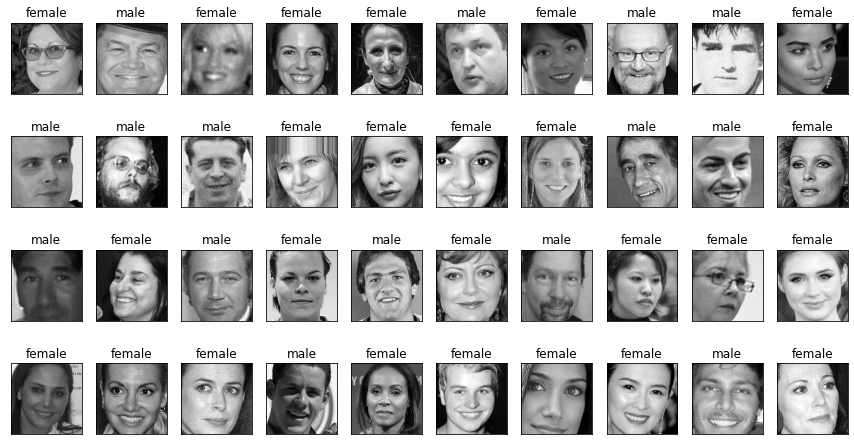

====================Eigen Images====================


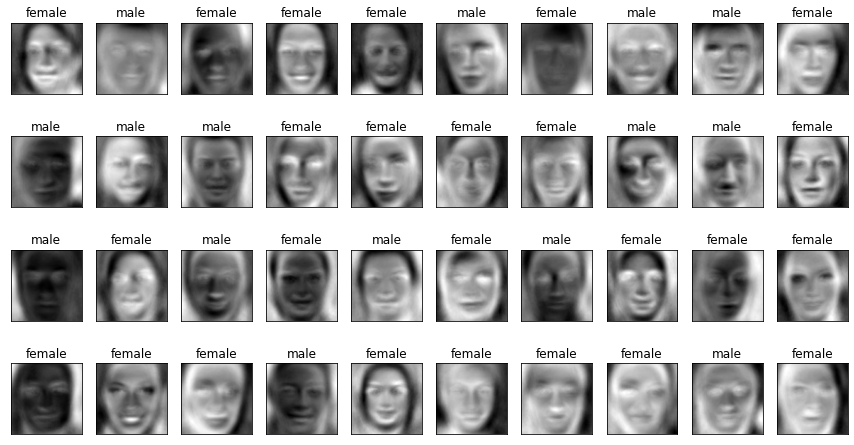

In [ ]:

def label(y):
	if y==0:
		return 'male'
	else:
		return 'female'

np.random.randint(1001)
pics = np.random.randint(0,5465,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
	plt.subplot(4,10,i+1)
	img = x[pic:pic+1].reshape(100,100)
	plt.imshow(img,cmap='gray')
	plt.title('{}'.format(label(y[pic])))
	plt.xticks([])
	plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
	plt.subplot(4,10,i+1)
	img = x_pca_inv[pic:pic+1].reshape(100,100)
	plt.imshow(img,cmap='gray')
	plt.title('{}'.format(label(y[pic])))
	plt.xticks([])
	plt.yticks([])
plt.show()

In [ ]:
#saving
np.savez('/content/drive/MyDrive/data_pca_50_y_mean.pickle',x_pca_50,y,x.mean(axis=0))